
<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Subsurface Data Analytics 

## Interactive Gradient Descent

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)


### PGE 383 Exercise: Interactive Gradient Descent

Here's a simple demonstration of gradient descent. I have a lecture that describes the basics of optimization for machine learning model training, [Optimization Lecture](https://www.youtube.com/watch?v=4nYz5j0sAQs&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=23&t=578s)

In this demonstration you will be able to take a customimizable loss function.

* you can vary the magnitude and spatial correlation of the noise

* **magnitude of noise** is controlled by the standard deviation of a Gaussian random residual 

* **spatialcorrelation of noise** is controlled by the size of a Gaussian kernal applied to convolve the random noise to impose spatial structure 

Then you can set the:

* **initial parameter combination** ($\phi_1, \phi_2$)

* **initial learning rate** \[0.1,5\]

* **momentum** \[0.0,1.0\]

* **

* simple polynomial model

* 1 preditor feature and 1 response feature

for an high interpretability model/ simple illustration.

#### Train / Test Split

The available data is split into training and testing subsets.

* in general 15-30% of the data is withheld from training to apply as testing data

* testing data selection should be fair, the same difficulty of predictions (offset/different from the training dat

#### Machine Learning Model Traing

The training data is applied to train the model parameters such that the model minimizes mismatch with the training data

* it is common to use **mean square error** (known as a **L2 norm**) as a loss function summarizing the model mismatch

* **miminizing the loss function** for simple models an anlytical solution may be available, but for most machine this requires an iterative optimization method to find the best model parameters

This process is repeated over a range of model complexities specified by hyperparameters. 

#### Machine Learning Model Tuning

The withheld testing data is retrieved and loss function (usually the **L2 norm** again) is calculated to summarize the error over the testing data

* this is repeated over over the range of specified hypparameters

* the model complexity / hyperparameters that minimize the loss function / error summary in testing is selected

This is known are model hypparameter tuning.

#### Machine Learning Model Overfit

More model complexity/flexibility than can be justified with the available data, data accuracy, frequency and coverage

* Model explains “idiosyncrasies” of the data, capturing data noise/error in the model

* High accuracy in training, but low accuracy in testing / real-world use away from training data cases – poor ability of the model to generalize


#### Workflow Goals

Learn the basics of machine learning training, tuning for model generalization while avoiding model overfit.

This includes:

* Demonstrate model training and tuning by hand with an interactive exercies

* Demonstrate the role of data error in leading to model overfit with complicated models

#### Getting Started

You will need to copy the following data files to your working directory.  They are available [here](https://github.com/GeostatsGuy/GeoDataSets):

* Tabular data - [Stochastic_1D_por_perm_demo.csv](https://github.com/GeostatsGuy/GeoDataSets/blob/master/Stochastic_1D_por_perm_demo.csv)
* Tabular data - [Random_Parabola.csv](https://github.com/GeostatsGuy/GeoDataSets/blob/master/Random_Parabola.csv)

These datasets are available in the folder: https://github.com/GeostatsGuy/GeoDataSets.


#### Import Required Packages

We will also need some standard packages. These should have been installed with Anaconda 3.

In [1]:
%matplotlib inline
%matplotlib notebook
import sys                                              # supress output to screen for interactive variogram modeling                                             
import math                                             # square root operator
import numpy as np                                      # arrays and matrix math
import matplotlib.pyplot as plt                         # plotting
import scipy                                            # kernel for convolution
from ipywidgets import interactive                      # widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox
from scipy.interpolate import griddata
from matplotlib.animation import FuncAnimation
import scipy.signal as signal
from scipy.interpolate import RegularGridInterpolator
from matplotlib import animation

#### Animated Optimization



#### Make the Exhaustive Loss Function

Let's ensure a global minimum in the middle of the solution space and add some structured noise to increase the difficulty

* local minimums for gradient descent to get stuck

In [2]:
nx = 100; ny = 100                                        # size of the loss function grid
cmap = plt.cm.inferno                                     # set the colormap
xmin = 0.0; xmax = 100.0; ymin = 0.0; ymax = 100.0        # set the extents
X, Y = np.mgrid[ymin:ymax:complex(ny), 0:100:complex(nx)]
XY = np.vstack((Y.flatten(), X.flatten())).T              # make location list for interpolation method
XY_list = list(map(tuple, XY))
x = np.zeros(100); y = np.zeros(100)                    

<IPython.core.display.Javascript object>


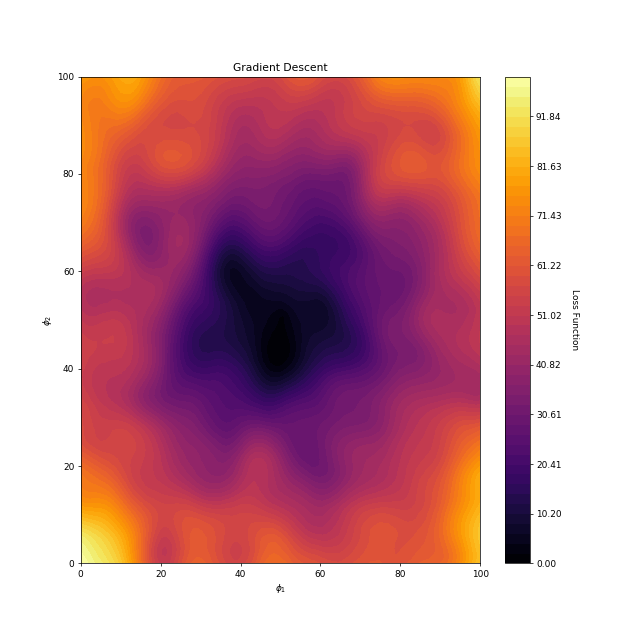

Text(0.5, 1.0, 'Gradient Descent')

In [3]:
# Make the truth loss function
nsmooth = 20
np.random.seed(73073)                                # set random number seed for repeatable results

truth = np.zeros([100,100])
for iy in range(100):
    for ix in range(100):
        truth[iy,ix] = math.sqrt((iy-50)*(iy-50) + (ix-50)*(ix-50))

noise = np.random.normal(loc=0.0, scale=5.0, size=(100,100))
w = np.ones((nsmooth,nsmooth))/(nsmooth*nsmooth)

gkern1d = signal.gaussian(nsmooth, std=nsmooth*0.2).reshape(nsmooth, 1); gkern2d = np.outer(gkern1d, gkern1d) # Teddy Hartanto, 2017, stack overflow 
gkern2d = gkern2d/np.sum(gkern2d.flatten())

noise = signal.convolve2d(noise,gkern2d,mode = 'same',boundary='symm')   

truth = truth + noise*10

truth = (truth - np.min(truth))/(np.max(truth) - np.min(truth))*100.0

# initialize the fast interpolator to evaluate the loss function at any location
interp = RegularGridInterpolator((np.linspace(ymin,ymax,ny),np.linspace(xmin,xmax,nx)),truth, method = 'linear')
x = np.zeros(100); y = np.zeros(100)                          # descent path arrays

fig = plt.figure(figsize = (10,10)); ax = plt.gca()
plt.xlim([0,100]); plt.ylim([0,100])
c1 = ax.contourf(X, Y, truth, cmap = plt.cm.inferno,vmin=0,vmax=100,levels=np.linspace(0, 100, 50))
cbar = plt.colorbar(c1);
cbar.set_label('Loss Function',rotation = 270,labelpad = 20)
plt.xlabel(r'$\phi_1$'); plt.ylabel(r'$\phi_2$'); plt.title('Gradient Descent')

#### Set Parameters for this Model Run and Run the Animation

You can change the following parameters and then watch the animation of the gradient descent path.

* **r** - learning rate (distance units of the \[0,100\] parmaeter space 
* **momentum - momentum weight (weight on the previous step), from \[0.0 - no mommentum, 1.0 - next step is previous step\]
* **make_video** - False, run and visualize, True, only make the specified mpeg video file
* **x\[0\]**, **y\[0\]** - initial location for descent path 
* **delta** - offset applied for numerical differentiation to calculate the local gradient by sampling

In [ ]:
r = 3.5
momentum = 0.9
make_video = False
x[0] = 25.0; y[0] = 0.0
delta = 0.001

# set up the plot
fig = plt.figure(figsize = (12,10))
ax = plt.gca()
ax.set_xlim([xmin,xmax]); ax.set_ylim([ymin,ymax])
ax.set_xlabel(r'$\phi_1$'); ax.set_ylabel(r'$\phi_2$'); ax.set_title('Gradient Descent')
plt.rc('xtick', labelsize=10); plt.rc('ytick', labelsize=10) 
plt.rc('axes', titlesize=20); plt.rc('axes', labelsize=15) 
point, = ax.plot([],[], marker="o",c=plt.cm.inferno((interp((x[0],y[0])).item())/100), 
            markeredgecolor = "white", ms=15, alpha = 1.0)
cbar = plt.colorbar(c1);
cbar.set_label('Loss Function',rotation = 270,labelpad = 20)
global line

x = np.clip(x,xmin+delta,xmax-delta); y = np.clip(y,ymin+delta,ymax-delta) # ensure start is not too close to edge
for i in range(1,100):    
    gradient_x = (interp((y[i-1], x[i-1]+delta)).item()-interp((y[i-1], x[i-1]-delta)).item())/(2*delta)
    gradient_y = (interp((y[i-1]+delta, x[i-1])).item()-interp((y[i-1]-delta, x[i-1])).item())/(2*delta)
    
    if i > 1: # include mommentum
        x_step = momentum*prev_x + (1.0-momentum)*(-1*r*gradient_x) # integrat momentum
        y_step = momentum*prev_y + (1.0-momentum)*(-1*r*gradient_y) # integrat momentum
    else: 
        x_step = -1*r*gradient_x 
        y_step = -1*r*gradient_y       
      
    x[i] = x[i-1] + x_step                               # step forward
    y[i] = y[i-1] + y_step 
    
    x[i] = np.clip(x[i],xmin+delta,xmax-delta); y[i] = np.clip(y[i],ymin+delta,ymax-delta) # ensure point is not too close to edge

    prev_x = (x[i] - x[i-1])                              # store current step for momentum on next step
    prev_y = (y[i] - y[i-1])
               
def init():                                             # animation initialization function
    ax = plt.gca()
#     for c in plt.collections: # possibly better to use: for c in plt.lines (see comment)
#         if c.get_gid() == 'line':
#             c.remove()
    #print(line)
    #ax.lines.remove(ax.lines)
    c1 = ax.contourf(X, Y, truth, cmap = plt.cm.inferno,vmin=0,vmax=100,levels=np.linspace(0, 100, 50))
    ax.contour(X, Y, truth, levels=10, linewidths=0.5, colors='black',linestyles='dashed') 
#    point, = ax.plot([],[], marker="o",c=plt.cm.inferno((interp((x[0],y[0])).item())/100), markeredgecolor = "white", ms=15, alpha = 1.0, label = 'line')
    #line.remove()
    
def update(frame):
    N = 5
    ax = plt.gca()     
    point.set_data(x[frame],y[frame])
    point.set_color(plt.cm.inferno((interp((y[frame],x[frame])).item())/100))
    line, = plt.plot(x[:frame],y[:frame],c='white',alpha=0.05,linewidth=5)

ani = FuncAnimation(fig, update, frames = np.arange(1, len(x)), init_func = init, # make the animation
    interval=100, blit=True, repeat = True)

if make_video:                                               # set up formatting for the movie files
    writer = animation.FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
    ani.save('gradient_descent.mp4', writer=writer)
    

In [ ]:
-5:i

#### Interactive Gradient Descent Demo



In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

#rc('animation', html='jshtml')

l = widgets.Text(value='                                       Gradient Descent Demo, Prof. Michael Pyrcz, The University of Texas at Austin',
                 layout=Layout(width='950px', height='30px'))

momentum = widgets.FloatSlider(min=0.0, max = 1.0, value=0.5, step = 0.1, description = 'Momentum',orientation='horizontal',style = {'description_width': 'initial'}, continuous_update=False)
r = widgets.FloatSlider(min=1.0, max = 5.0, value=1.5, step = 0.25, description = 'Noise StDev',orientation='horizontal',style = {'description_width': 'initial'}, continuous_update=False)

ui = widgets.HBox([momentum,r],)
ui2 = widgets.VBox([l,ui],)

def run_plot(momentum,r):
    make_video = False
    nx = 100; ny = 100                                        # size of the loss function grid
    cmap = plt.cm.inferno                                     # set the colormap
    xmin = 0.0; xmax = 100.0; ymin = 0.0; ymax = 100.0        # set the extents
    X, Y = np.mgrid[ymin:ymax:complex(ny), 0:100:complex(nx)]
    XY = np.vstack((Y.flatten(), X.flatten())).T              # make location list for interpolation method
    XY_list = list(map(tuple, XY))
    x = np.zeros(100); y = np.zeros(100)     
        
    x[0] = 25.0; y[0] = 0.0
    delta = 0.001
    
    # set up the plot
    fig = plt.figure(figsize = (12,10))
    ax = plt.gca()
    ax.set_xlim([xmin,xmax]); ax.set_ylim([ymin,ymax])
    ax.set_xlabel(r'$\phi_1$'); ax.set_ylabel(r'$\phi_2$'); ax.set_title('Gradient Descent')
    plt.rc('xtick', labelsize=10); plt.rc('ytick', labelsize=10) 
    plt.rc('axes', titlesize=20); plt.rc('axes', labelsize=15) 
    cbar = plt.colorbar(c1);
    cbar.set_label('Loss Function',rotation = 270,labelpad = 20)
    point, = ax.plot([],[], marker="o",c=plt.cm.inferno((interp((x[0],y[0])).item())/100), markeredgecolor = "white", ms=15, alpha = 1.0)
    
    x = np.clip(x,xmin+delta,xmax-delta); y = np.clip(y,ymin+delta,ymax-delta) # ensure start is not too close to edge
    for i in range(1,100):    
        gradient_x = (interp((y[i-1], x[i-1]+delta)).item()-interp((y[i-1], x[i-1]-delta)).item())/(2*delta)
        gradient_y = (interp((y[i-1]+delta, x[i-1])).item()-interp((y[i-1]-delta, x[i-1])).item())/(2*delta)
        
        if i > 1: # include mommentum
            x_step = momentum*prev_x + (1.0-momentum)*(-1*r*gradient_x) # integrat momentum
            y_step = momentum*prev_y + (1.0-momentum)*(-1*r*gradient_y) # integrat momentum
        else: 
            x_step = -1*r*gradient_x 
            y_step = -1*r*gradient_y       
          
        x[i] = x[i-1] + x_step                               # step forward
        y[i] = y[i-1] + y_step 
        
        x[i] = np.clip(x[i],xmin+delta,xmax-delta); y[i] = np.clip(y[i],ymin+delta,ymax-delta) # ensure point is not too close to edge
    
        prev_x = (x[i] - x[i-1])                              # store current step for momentum on next step
        prev_y = (y[i] - y[i-1])
                   
    def init():                                             # animation initialization function
        ax = plt.gca()
        c1 = ax.contourf(X, Y, truth, cmap = plt.cm.inferno,vmin=0,vmax=100,levels=np.linspace(0, 100, 50))
        ax.contour(X, Y, truth, levels=10, linewidths=0.5, colors='black',linestyles='dashed') 
        
    def update(i):
        ax = plt.gca()     
        point.set_data(x[i],y[i])
        point.set_color(plt.cm.inferno((interp((y[i],x[i])).item())/100))
        ax.plot(x[:i],y[:i],c='white',alpha=0.05,linewidth=5)
    
    ani = FuncAnimation(fig, update, np.arange(1, len(x)), init_func = init, # make the animation
        interval=10, blit=True, repeat = True)
    
    #HTML(ani.to_html5_video())
    #HTML(ani.to_jshtml())
    
    if make_video:                                               # set up formatting for the movie files
        writer = animation.FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
        ani.save('gradient_descent.mp4', writer=writer)
          
# connect the function to make the samples and plot to the widgets    
interactive_plot = widgets.interactive_output(run_plot, {'momentum':momentum,'r':r})
#interactive_plot.clear_output(wait = False)               # reduce flickering by delaying plot updating

### Gradient Descent Optimization for Machine Learning Interactive Demonstation 

#### Michael Pyrcz, Associate Professo, University of Texas at Austin 

TBD

### The Inputs

* **r** - learning rate (distance units of the \[0,100\] parmaeter space 
* **momentum - momentum weight (weight on the previous step), from \[0.0 - no mommentum, 1.0 - next step is previous step\]
* **make_video** - False, run and visualize, True, only make the specified mpeg video file
* **x\[0\]**, **y\[0\]** - initial location for descent path 
* **delta** - offset applied for numerical differentiation to calculate the local gradient by sampling

Currently this will only make videos, I can't get the animization to show within ipywidgets

In [ ]:
display(ui2, interactive_plot)                           # display the interactive plot

#### Comments

This was a basic demonstration of machine learning model training and tuning, model generalization and complexity. I have many other demonstrations and even basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  
  

<IPython.core.display.Javascript object>


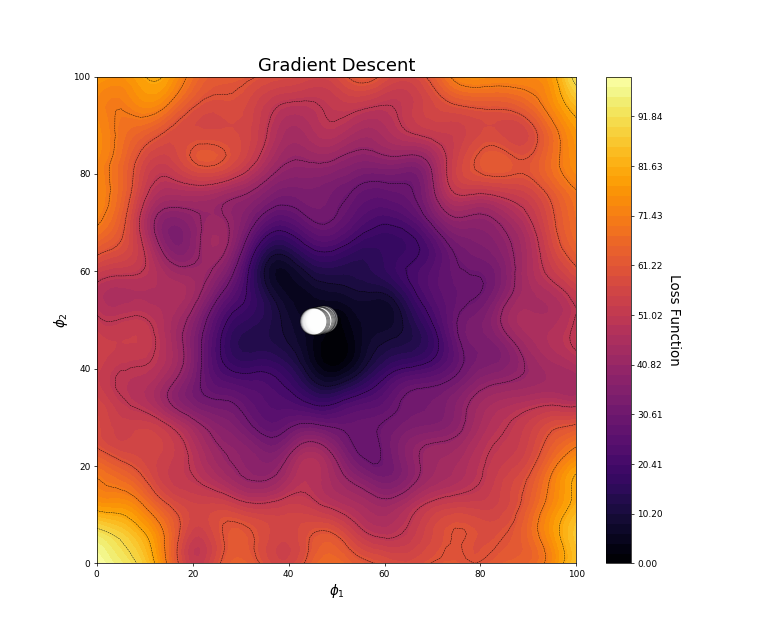

In [22]:
r0 = 10.0
momentum = 0.9
make_video = False

delta = 0.001
k = 0.04                                         # exponential decay parameter

x = np.zeros(100); y = np.zeros(100)
x[0] = 5.0; y[0] = 50.0

plt.close()
# set up the plot
fig = plt.figure(figsize = (12,10))
ax = plt.gca()
ax.set_xlim([xmin,xmax]); ax.set_ylim([ymin,ymax])
ax.set_xlabel(r'$\phi_1$'); ax.set_ylabel(r'$\phi_2$'); ax.set_title('Gradient Descent')
plt.rc('xtick', labelsize=10); plt.rc('ytick', labelsize=10) 
plt.rc('axes', titlesize=20); plt.rc('axes', labelsize=15) 
point, = ax.plot([],[], marker="o",c='white', 
            markeredgecolor = "black", ms=30, alpha = 0.5)
cbar = plt.colorbar(c1);
cbar.set_label('Loss Function',rotation = 270,labelpad = 20)
global line

x = np.clip(x,xmin+delta,xmax-delta); y = np.clip(y,ymin+delta,ymax-delta) # ensure start is not too close to edge
for i in range(1,100):    
    gradient_x = (interp((y[i-1], x[i-1]+delta)).item()-interp((y[i-1], x[i-1]-delta)).item())/(2*delta)
    gradient_y = (interp((y[i-1]+delta, x[i-1])).item()-interp((y[i-1]-delta, x[i-1])).item())/(2*delta)
    
    r = r0 * math.exp(-k*i)    
    
    if i > 1: # include mommentum
        x_step = momentum*prev_x + (1.0-momentum)*(-1*r*gradient_x) # integrat momentum
        y_step = momentum*prev_y + (1.0-momentum)*(-1*r*gradient_y) # integrat momentum
    else: 
        x_step = -1*r*gradient_x 
        y_step = -1*r*gradient_y 
      
    x[i] = x[i-1] + x_step                               # step forward
    y[i] = y[i-1] + y_step 
    
    x[i] = np.clip(x[i],xmin+delta,xmax-delta); y[i] = np.clip(y[i],ymin+delta,ymax-delta) # ensure point is not too close to edge

    prev_x = (x[i] - x[i-1])                              # store current step for momentum on next step
    prev_y = (y[i] - y[i-1])
               
def init():                                             # animation initialization function
    ax = plt.gca()
    c1 = ax.contourf(X, Y, truth, cmap = plt.cm.inferno,vmin=0,vmax=100,levels=np.linspace(0, 100, 50))
    ax.contour(X, Y, truth, levels=10, linewidths=0.5, colors='black',linestyles='dashed') 
    
def update(frame):
    N = 10
    ax = plt.gca()
    N = min(N,frame)
    top = min(frame,90)
    point.set_data(x[frame-N:top],y[frame-N:top])
    #point.set_sizes(np.linspace(1,N,N))
    #point.set_color(plt.cm.inferno((interp((y[frame],x[frame])).item())/100))

ani = FuncAnimation(fig, update, frames = np.arange(1, len(x)-20), init_func = init, # make the animation
    interval=100, blit=True, repeat = False)

if make_video:                                               # set up formatting for the movie files
    writer = animation.FFMpegWriter(fps=15, metadata=dict(artist='Michael Pyrcz'), bitrate=100000)
    ani.save('gradient_descent.mp4', writer=writer)
    

In [8]:
x[90-20:80]
x

array([5.00000000e+00, 1.09732151e+01, 1.66005737e+01, 2.26402826e+01,
       2.74773594e+01, 3.24681367e+01, 3.65755385e+01, 4.16798377e+01,
       4.70823671e+01, 5.08227895e+01, 5.29042218e+01, 5.35516769e+01,
       5.29814415e+01, 5.18579690e+01, 5.00922320e+01, 4.83208676e+01,
       4.63086883e+01, 4.42477544e+01, 4.25447098e+01, 4.13299349e+01,
       4.15426236e+01, 4.23916660e+01, 4.37224425e+01, 4.47674252e+01,
       4.53579521e+01, 4.55815336e+01, 4.53184349e+01, 4.48883008e+01,
       4.43364513e+01, 4.39017758e+01, 4.35581920e+01, 4.32781110e+01,
       4.32553479e+01, 4.34076260e+01, 4.36934037e+01, 4.38853347e+01,
       4.40235862e+01, 4.41277874e+01, 4.42048521e+01, 4.42534424e+01,
       4.42670355e+01, 4.42565021e+01, 4.42230012e+01, 4.41817463e+01,
       4.41360576e+01, 4.40815382e+01, 4.40084635e+01, 4.39253691e+01,
       4.38506894e+01, 4.37888653e+01, 1.00000000e-03, 1.00000000e-03,
       1.00000000e-03, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
      

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

rc('animation', html='jshtml')

l = widgets.Text(value='                                       Gradient Descent Demo, Prof. Michael Pyrcz, The University of Texas at Austin',
                 layout=Layout(width='950px', height='30px'))

momentum = widgets.FloatSlider(min=0.0, max = 1.0, value=0.5, step = 0.1, description = 'Momentum',orientation='horizontal',style = {'description_width': 'initial'}, continuous_update=False)
r = widgets.FloatSlider(min=1.0, max = 5.0, value=1.5, step = 0.25, description = 'Noise StDev',orientation='horizontal',style = {'description_width': 'initial'}, continuous_update=False)

ui = widgets.HBox([momentum,r],)
ui2 = widgets.VBox([l,ui],)

def run_plot(momentum,r):
    make_video = False
    nx = 100; ny = 100                                        # size of the loss function grid
    cmap = plt.cm.inferno                                     # set the colormap
    xmin = 0.0; xmax = 100.0; ymin = 0.0; ymax = 100.0        # set the extents
    X, Y = np.mgrid[ymin:ymax:complex(ny), 0:100:complex(nx)]
    XY = np.vstack((Y.flatten(), X.flatten())).T              # make location list for interpolation method
    XY_list = list(map(tuple, XY))
    x = np.zeros(100); y = np.zeros(100)     
        
    make_video = False
    x[0] = 25.0; y[0] = 0.0
    delta = 0.001
    
    x = np.zeros(50); y = np.zeros(50)
    
    plt.close()
    # set up the plot
    fig = plt.figure(figsize = (12,10))
    ax = plt.gca()
    ax.set_xlim([xmin,xmax]); ax.set_ylim([ymin,ymax])
    ax.set_xlabel(r'$\phi_1$'); ax.set_ylabel(r'$\phi_2$'); ax.set_title('Gradient Descent')
    plt.rc('xtick', labelsize=10); plt.rc('ytick', labelsize=10) 
    plt.rc('axes', titlesize=20); plt.rc('axes', labelsize=15) 
    point, = ax.plot([],[], marker="o",c='white', 
                markeredgecolor = "black", ms=30, alpha = 0.5)
    cbar = plt.colorbar(c1);
    cbar.set_label('Loss Function',rotation = 270,labelpad = 20)
    global line
    
    x = np.clip(x,xmin+delta,xmax-delta); y = np.clip(y,ymin+delta,ymax-delta) # ensure start is not too close to edge
    for i in range(1,50):    
        gradient_x = (interp((y[i-1], x[i-1]+delta)).item()-interp((y[i-1], x[i-1]-delta)).item())/(2*delta)
        gradient_y = (interp((y[i-1]+delta, x[i-1])).item()-interp((y[i-1]-delta, x[i-1])).item())/(2*delta)
        
        if i > 1: # include mommentum
            x_step = momentum*prev_x + (1.0-momentum)*(-1*r*gradient_x) # integrat momentum
            y_step = momentum*prev_y + (1.0-momentum)*(-1*r*gradient_y) # integrat momentum
        else: 
            x_step = -1*r*gradient_x 
            y_step = -1*r*gradient_y       
          
        x[i] = x[i-1] + x_step                               # step forward
        y[i] = y[i-1] + y_step 
        
        x[i] = np.clip(x[i],xmin+delta,xmax-delta); y[i] = np.clip(y[i],ymin+delta,ymax-delta) # ensure point is not too close to edge
    
        prev_x = (x[i] - x[i-1])                              # store current step for momentum on next step
        prev_y = (y[i] - y[i-1])
                   
    def init():                                             # animation initialization function
        ax = plt.gca()
        c1 = ax.contourf(X, Y, truth, cmap = plt.cm.inferno,vmin=0,vmax=100,levels=np.linspace(0, 100, 50))
        ax.contour(X, Y, truth, levels=10, linewidths=0.5, colors='black',linestyles='dashed') 
        
    def update(frame):
        N = 10
        ax = plt.gca()
        N = min(N,frame-1)
        point.set_data(x[frame-N:frame],y[frame-N:frame])
        #point.set_sizes(np.linspace(1,N,N))
        #point.set_color(plt.cm.inferno((interp((y[frame],x[frame])).item())/100))
    
    ani = FuncAnimation(fig, update, frames = np.arange(1, len(x)), init_func = init, # make the animation
        interval=100, blit=True, repeat = True)
    
    if make_video:                                               # set up formatting for the movie files
        writer = animation.FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
        ani.save('gradient_descent.mp4', writer=writer)
              
# connect the function to make the samples and plot to the widgets    
interactive_plot = widgets.interactive_output(run_plot, {'momentum':momentum,'r':r})
#interactive_plot.clear_output(wait = False)               # reduce flickering by delaying plot updating

display(ui2, interactive_plot)                           # display the interactive plot

In [ ]:
np.linspace(1,10,10)